In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##   Questions
### - In which country are people the happiest?
### - Which factor is most closely related to happiness index?
### - Do people living in richer countries feel happier?

In [2]:
data = pd.read_csv("C:/Users/j-lan/Desktop/ironhack/week5/mid_bootcamp_project/data/clean/world_happiness_report.csv")
data.head()

,Unnamed: 0,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,1,Albania,Central and Eastern Europe,2022,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502,0.547126,0.254826
1,2,Argentina,Latin America and Caribbean,2022,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037,0.724068,0.284279
2,3,Armenia,Commonwealth of Independent States,2022,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730,0.530931,0.549468
3,4,Australia,North America and ANZ,2022,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217,0.710772,0.243920
4,5,Austria,Western Europe,2022,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212,0.717616,0.226395


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data = data.sort_values(by='life_ladder', ascending=False)

In [5]:
data.reset_index(drop=True, inplace=True)
data

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Finland,Western Europe,2022,7.728998,10.814193,0.974395,71.224998,0.958609,0.102147,0.190207,0.741323,0.191473
1,Israel,Middle East and North Africa,2022,7.662397,10.692273,0.953653,72.849998,0.774947,-0.004873,0.654699,0.582625,0.182902
2,Denmark,Western Europe,2022,7.544965,10.994299,0.970306,71.375000,0.929547,0.224115,0.203140,0.786820,0.205441
3,Iceland,Western Europe,2022,7.448794,10.935112,0.984801,72.074997,0.935669,0.221911,0.692434,0.768394,0.177993
4,Sweden,Western Europe,2022,7.431214,10.912662,0.949338,72.275002,0.939462,0.234011,0.213236,0.750373,0.163276
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Bangladesh,South Asia,2022,3.407532,8.743257,0.403708,64.675003,0.864576,-0.054776,0.616872,0.393517,0.448060
98,Malawi,Sub-Saharan Africa,2022,3.355563,7.295768,0.503325,58.750000,0.743572,0.020474,0.754926,0.535637,0.328764
99,Zimbabwe,Sub-Saharan Africa,2022,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350
100,Sierra Leone,Sub-Saharan Africa,2022,2.560430,7.401131,0.502168,55.299999,0.659596,0.100536,0.861837,0.493701,0.504607


# 1. People in Finland are the happiest in the world

In [6]:
happiest_country = data.loc[0:9]

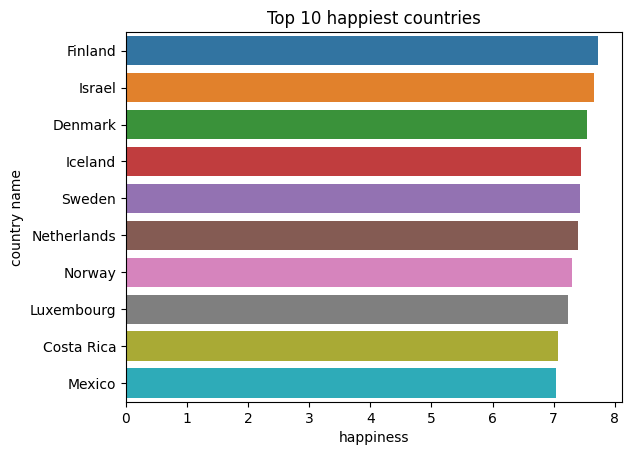

In [7]:
sns.barplot(x='life_ladder', y='country_name', data=happiest_country)
plt.xlabel('happiness')
plt.ylabel('country name')
plt.title('Top 10 happiest countries')
plt.show()

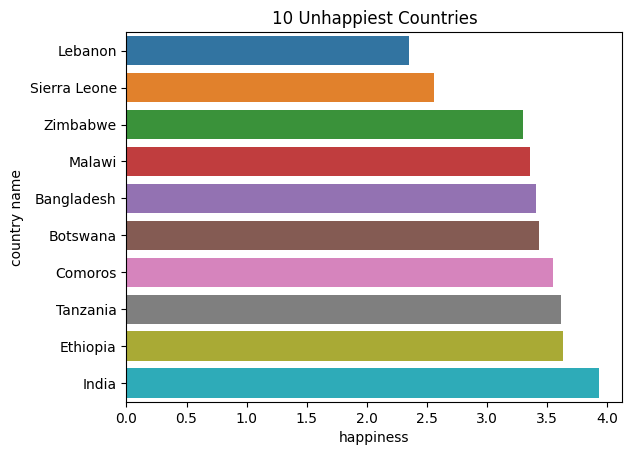

In [8]:
unhappiest_country = data.sort_values(by='life_ladder', ascending=True).head(10)
sns.barplot(x='life_ladder', y='country_name', data=unhappiest_country)
plt.xlabel('happiness')
plt.ylabel('country name')
plt.title('10 Unhappiest Countries')
plt.show()

## Show all scatterplots about 'life ladder' and ' factors'

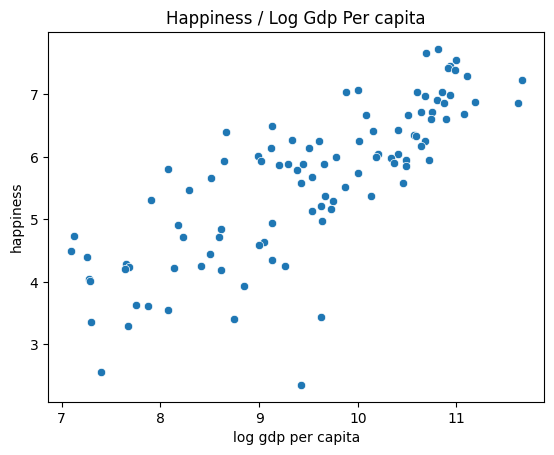

In [9]:
sx = sns.scatterplot(x=data['log_gdp_per_capita'], y=data['life_ladder'])
sx.set(title="Happiness / Log Gdp Per capita", ylabel="happiness", xlabel="log gdp per capita")
plt.show()

### This graph shows that people in richer countries are happier. However, there are two exceptions to this trend. Botswana and Lebanon	. Their per capita GDP is not very low, but their level of happiness does not conform to the trend. Because Lebanon has extremely low social support (sixth bottom) and Botswana has extremely low life expectancy (fifth bottom)

In [10]:
outlier = data[(data['log_gdp_per_capita']>9.3) & (data['life_ladder']<3.5)]
outlier

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
96,Botswana,Sub-Saharan Africa,2022,3.435275,9.629346,0.750399,54.724998,0.739403,-0.214621,0.830940,0.623351,0.286919
101,Lebanon,Middle East and North Africa,2022,2.352428,9.428473,0.534528,66.224998,0.449575,-0.125514,0.882996,0.297508,0.429903


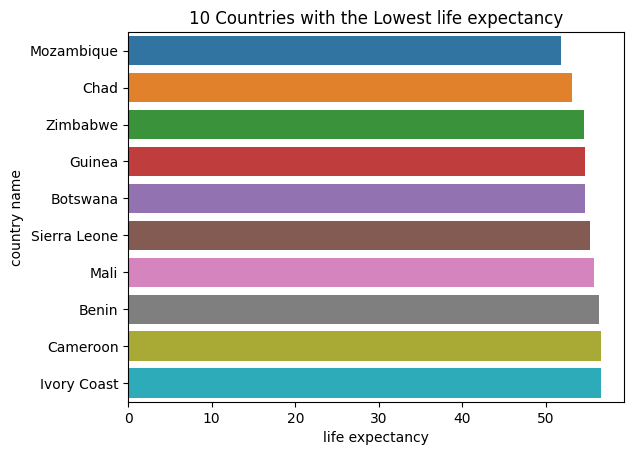

In [11]:
lowest_life_expectancy_countires = data.sort_values(by='healthy_life_expectancy_at_birth', ascending=True).head(10)
sns.barplot(x='healthy_life_expectancy_at_birth', y='country_name', data=lowest_life_expectancy_countires)
plt.xlabel('life expectancy')
plt.ylabel('country name')
plt.title('10 Countries with the Lowest life expectancy')
plt.show()

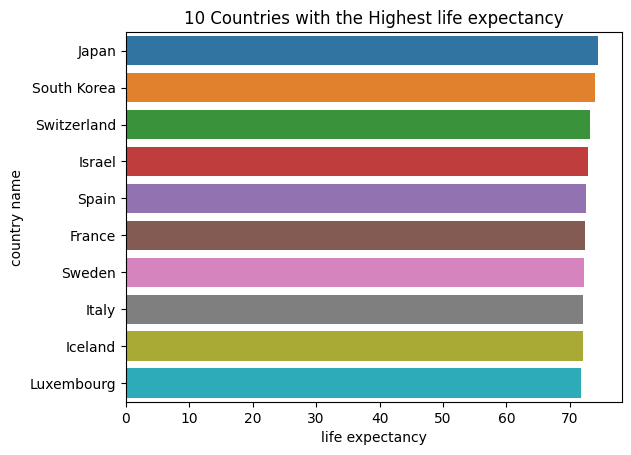

In [12]:
lowest_life_expectancy_countires = data.sort_values(by='healthy_life_expectancy_at_birth', ascending=False).head(10)
sns.barplot(x='healthy_life_expectancy_at_birth', y='country_name', data=lowest_life_expectancy_countires)
plt.xlabel('life expectancy')
plt.ylabel('country name')
plt.title('10 Countries with the Highest life expectancy')
plt.show()

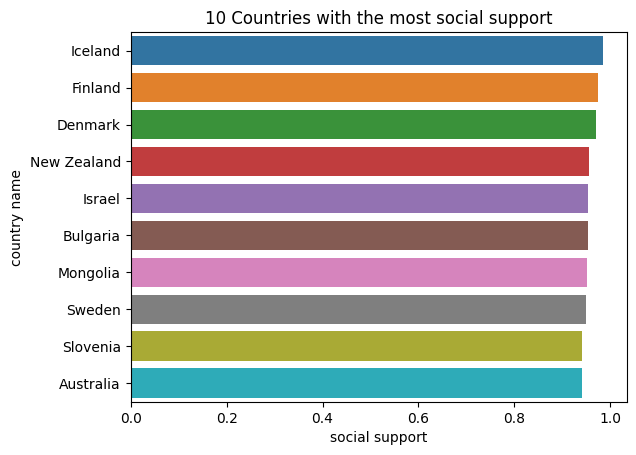

In [13]:
most_social_support_countires = data.sort_values(by='social_support', ascending=False).head(10)
sns.barplot(x='social_support', y='country_name', data = most_social_support_countires)
plt.xlabel('social support')
plt.ylabel('country name')
plt.title('10 Countries with the most social support')
plt.show()

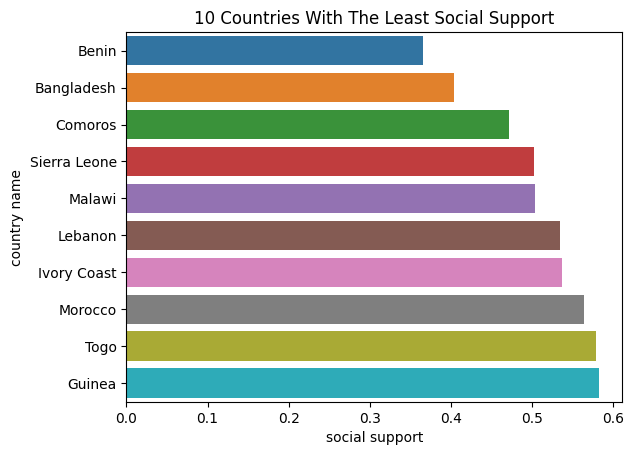

In [14]:
least_social_support_countires = data.sort_values(by='social_support', ascending=True).head(10)
sns.barplot(x='social_support', y='country_name', data = least_social_support_countires)
plt.xlabel('social support')
plt.ylabel('country name')
plt.title('10 Countries With The Least Social Support')
plt.show()

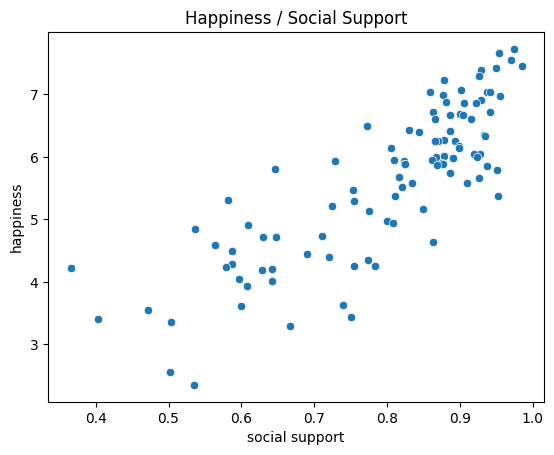

In [15]:
sx = sns.scatterplot(x=data['social_support'], y=data['life_ladder'])
sx.set(title="Happiness / Social Support", ylabel="happiness", xlabel="social support")
plt.show()
# social_support stands for help from relatives and friends

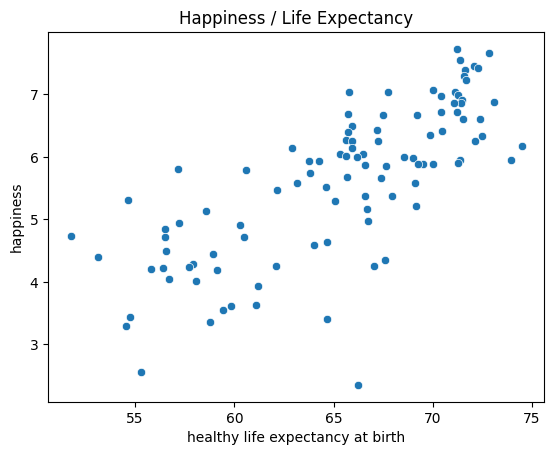

In [16]:
sx = sns.scatterplot(x=data['healthy_life_expectancy_at_birth'], y=data['life_ladder'])
sx.set(title="Happiness / Life Expectancy", ylabel="happiness", xlabel="healthy life expectancy at birth")
plt.show()

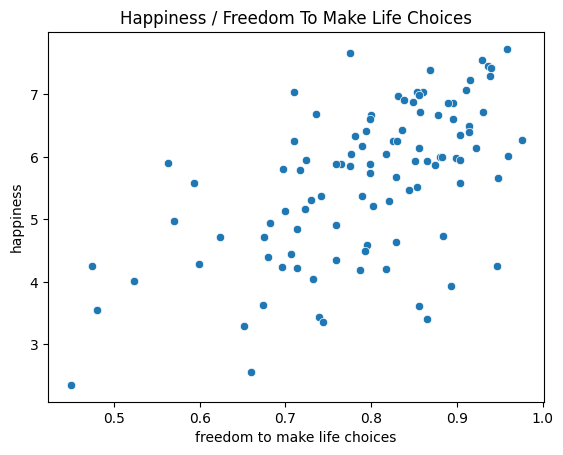

In [17]:
sx = sns.scatterplot(x=data['freedom_to_make_life_choices'], y=data['life_ladder'])
sx.set(title="Happiness / Freedom To Make Life Choices", ylabel="happiness", xlabel="freedom to make life choices")
plt.show()

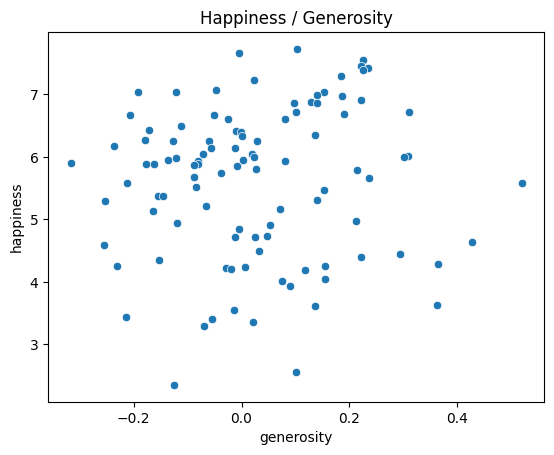

In [18]:
sx = sns.scatterplot(x=data['generosity'], y=data['life_ladder'])
sx.set(title="Happiness / Generosity", ylabel="happiness", xlabel="generosity")
plt.show()
# Have you donated money to a charity in the past month?

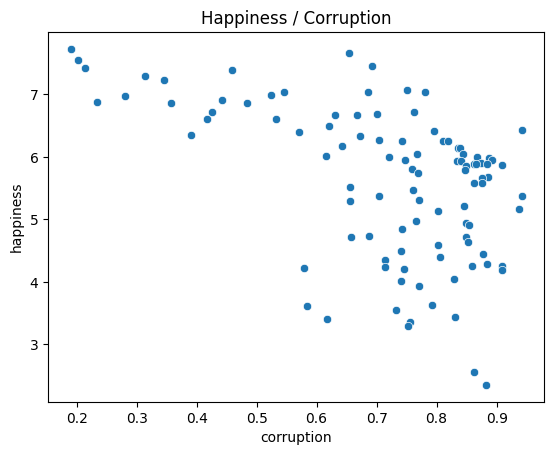

In [19]:
sx = sns.scatterplot(x=data['perceptions_of_corruption'], y=data['life_ladder'])
sx.set(title="Happiness / Corruption", ylabel="happiness", xlabel="corruption")
plt.show()
# Is corruption widespread throughout the government or not?
# Is corruption widespread within businesses or not?

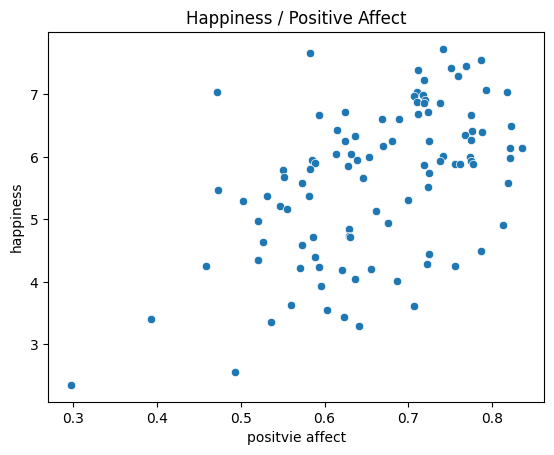

In [20]:
sx = sns.scatterplot(x=data['positive_affect'], y=data['life_ladder'])
sx.set(title="Happiness / Positive Affect", ylabel="happiness", xlabel="positvie affect")
plt.show()
# Positive affect is defined as the average of previous-day effects measures for laughter, enjoyment, and interest. 

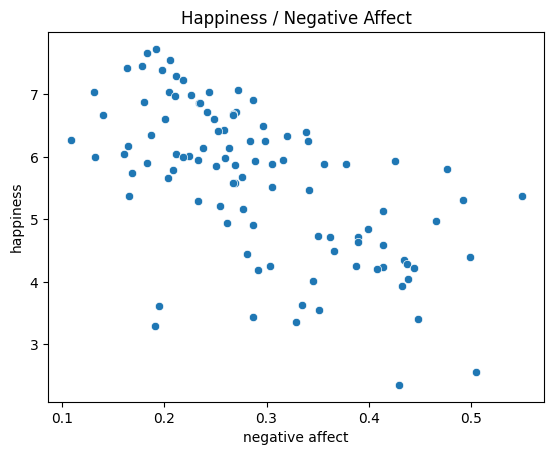

In [21]:
sx = sns.scatterplot(x=data['negative_affect'], y=data['life_ladder'])
sx.set(title="Happiness / Negative Affect", ylabel="happiness", xlabel="negative affect")
plt.show()
# Negative affect is defined as the average of previous-day effects measures for worry, sadness, and anger.

In [22]:
data.columns

Index(['country_name', 'regional_indicator', 'year', 'life_ladder',
       'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect'],
      dtype='object')

In [23]:
data1 = data.drop(['country_name', 'regional_indicator', 'year'], axis=1)
data1

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,7.728998,10.814193,0.974395,71.224998,0.958609,0.102147,0.190207,0.741323,0.191473
1,7.662397,10.692273,0.953653,72.849998,0.774947,-0.004873,0.654699,0.582625,0.182902
2,7.544965,10.994299,0.970306,71.375000,0.929547,0.224115,0.203140,0.786820,0.205441
3,7.448794,10.935112,0.984801,72.074997,0.935669,0.221911,0.692434,0.768394,0.177993
4,7.431214,10.912662,0.949338,72.275002,0.939462,0.234011,0.213236,0.750373,0.163276
...,...,...,...,...,...,...,...,...,...
97,3.407532,8.743257,0.403708,64.675003,0.864576,-0.054776,0.616872,0.393517,0.448060
98,3.355563,7.295768,0.503325,58.750000,0.743572,0.020474,0.754926,0.535637,0.328764
99,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350
100,2.560430,7.401131,0.502168,55.299999,0.659596,0.100536,0.861837,0.493701,0.504607


In [24]:
correlations_matrix = data1.corr()
correlations_matrix

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
life_ladder,1.000000,0.789684,0.824093,0.746842,0.578499,0.060568,-0.505169,0.516234,-0.604495
log_gdp_per_capita,0.789684,1.000000,0.785544,0.875452,0.361293,-0.083809,-0.454909,0.191774,-0.618797
social_support,0.824093,0.785544,1.000000,0.736789,0.475268,0.054768,-0.277107,0.375260,-0.678054
healthy_life_expectancy_at_birth,0.746842,0.875452,0.736789,1.000000,0.380724,-0.068143,-0.397922,0.187114,-0.545951
freedom_to_make_life_choices,0.578499,0.361293,0.475268,0.380724,1.000000,0.212111,-0.405840,0.554788,-0.390648
generosity,0.060568,-0.083809,0.054768,-0.068143,0.212111,1.000000,-0.271034,0.217675,0.024945
perceptions_of_corruption,-0.505169,-0.454909,-0.277107,-0.397922,-0.405840,-0.271034,1.000000,-0.255241,0.310788
positive_affect,0.516234,0.191774,0.375260,0.187114,0.554788,0.217675,-0.255241,1.000000,-0.331436
negative_affect,-0.604495,-0.618797,-0.678054,-0.545951,-0.390648,0.024945,0.310788,-0.331436,1.000000


### Answer2. 'social support' is most closely related to 'happiness'.

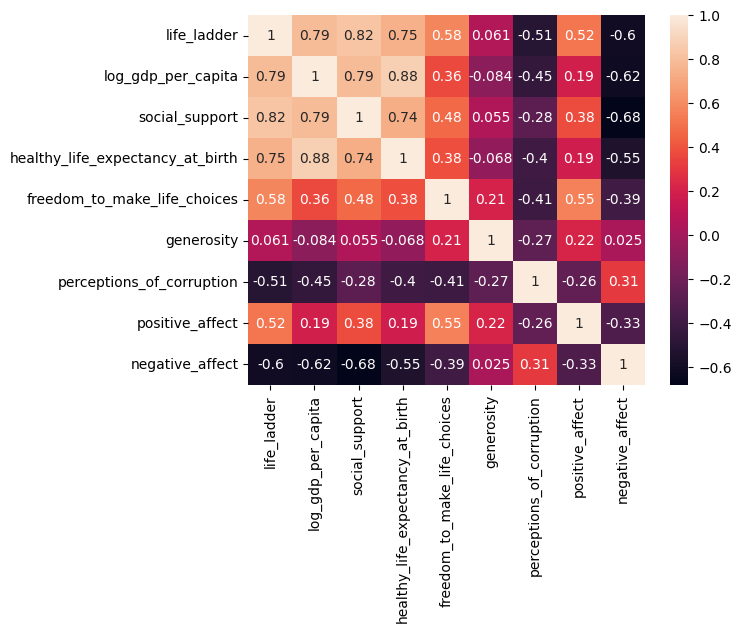

In [25]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Answer 3:

### Wealth is not the most important factor, nor is it the only factor that leads to happiness.

###  According to observation, in most cases, people living in richer countries feel happier.

###  But in special cases, in the face of  helpless in trouble, disease and other negative factors together, people living in richer countries does not feel happier.